# 앙상블 학습

보팅 : 여러개(다른 알고리즘)의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

 - 하드 보팅 : 다수결 원칙
 - 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 평균해서 가장 확률이 높은 레이블을 선정

배깅 : 각각의 분류기(같은 알고리즘)가 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행


## 보팅 분류기

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
clf_lr = LogisticRegression()
clf_knn = KNeighborsClassifier(n_neighbors=8) 
clf_vo = VotingClassifier(estimators=[('LR',clf_lr),('KNN',clf_knn)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

clf_vo.fit(X_train, y_train)
y_pred = clf_vo.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

Voting 분류기 정확도: 0.9474


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
classifiers = [clf_lr, clf_knn]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, y_pred)))

LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 랜덤 포레스트

의사결정나무로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

개별 트리가 학습하는 데이터셋은 전체 데이터에서 일부가 중첩되게 샘플링 된 데이터셋(bootstrapping)


In [20]:
feature_name_df = pd.read_csv('C:/Users/ytnal/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [25]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 
                                                              'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1])
                                                                            if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('C:/Users/ytnal/human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('C:/Users/ytnal/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('C:/Users/ytnal/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('C:/Users/ytnal/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('C:/Users/ytnal/human_activity/test/y_test.txt', sep='\s+', header= None, names=['action'])
    
    return X_train, X_test, y_train, y_test

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


랜덤 포레스트 하이퍼파라미터

n_estimators : 결정 트리의 개수 지정, 디폴트 10개

max_features : 결정 트리의 max_features와 같지만, 여기선 디폴트 값이 'None'이 아니라 'auto'임

max_depth, min_samples_leaf

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[6, 8, 10, 12],
         'min_samples_leaf':[8, 12, 18], 'min_samples_split':[8, 16, 20]}

clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf_rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [28]:
clf_rf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=0)

clf_rf1.fit(X_train, y_train)
y_pred = clf_rf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

예측 정확도: 0.9165


<AxesSubplot:title={'center':'Feature importances Top 20'}>

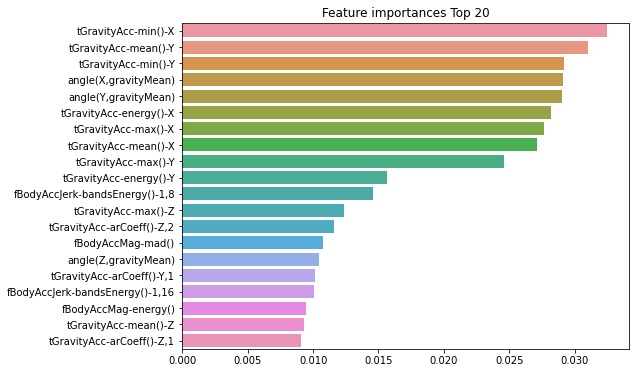

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = clf_rf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)

## GBM(Gradient Boosting Machine)

여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

clf_gb = GradientBoostingClassifier(random_state=0)
clf_gb.fit(X_train, y_train)
gb_pred = clf_gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 648.4 초


GBM 하이퍼 파라미터

loss : 경사 하강법에서 사용할 비용함수 지정. 특별한 이유 없으면 디폴트인 'deviance'를 그대로 적용

learning_rate : 0~1 사이를 지정하며, 기본값은 0.1,  너무 크지도 작지도 않은 값이 필요하며 보통 n_estimator와 보완하며 조합

n_estimators : weark learner의 개수. weark learner가 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 좋아지나 학습 속도는 느려짐. 기본값 100

subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1, 과적합이 염려되는 경우 1보다 낮은 값을 설정

In [36]:
# 코드 오래걸려서 안돌림

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 500], 'learning_rate':[0.05, 0.1]}

grid_cv = GridSearchCV(clf_gb, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## XGBoost

GBM을 기반으로 하지만, GBM의 단점인 느린 수행시간 및 과적합 규제 부재 등의 문제를 해결

XGB 하이퍼 파라미터

- 주요 일반 파라미터(쓰레드 개수나 silent 모드 등의 선택을 위한 파라미터. 일반적으론 디폴트값 사용
   - booster : gbtree(tree based model) 또는 gblinear(linear model) 선택. 디폴트는 gbtree
   - silent : 디폴트는 0, 출력메시지를 나타내고 싶지 않을 경우 1로 설정
   - nthread : CPU의 실행 쓰레드 수를 조정. 디폴트는 전체 쓰레드 사용
   
   
- 주요 부스터 파라미터(트리 최적화, 부스팅, regularization 등과 같은 관련 파라미터 등을 지칭
   - eta : GBM의 학습률과 같은 파라미터
   - num_boost_rounds : GBM의 n_estimator와 같은 파라미터
   - min_child_weight [default = 1] : 트리에서 가지를 추가적으로 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. 값이 클수록 분할을 자제
   - gamma [default = 0] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실함수. 값이 클수록 과적합 감소 효과
   - max_depth : 0을 지정하면 깊이의 제한이 없음
   - sub_sample [default = 1] : GBM의 subsample과 동일. 0~1이 가능하나 일반적으로 0.5~1을 사용
   - colsample_bytree [default=1] : GBM의 max_features와 유사. 트리 생성에 필요한 컬럼을 임의로 샘플링하는데 사용
   - lambda [default = 1] : L2 Regularization 적용 값. feature 수가 많을 때 적용을 검토하며 값이 클수록 과적합 감소 효과
   - alpha [default = 0] : L1 Regularization 적용 값. feature 수가 많을 때 적용을 검토하며 값이 클수록 과적합 감소 효과
   - scale_pos_weight [default = 1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터셋의 균형을 유지하기 위한 파라미터


- 주요 학습 태스크 파라미터(학습 수행시의 객체함수, 평가를 위한 지표 등을 설정하는 파라미터)
   - objective : 최솟값을 가져야 할 손실함수를 정의
       - binary:logistic : 이진분류일 때 적용
       - multi:softmax : 다중분류일 때 적용, 손실함수가 multi:softmax 일 때는 레이블 클래스의 개수인 num_class 파라미터 지정
       - multi:softprob : softmax와 유사하나 개별 레이블 클래스에 해댕되는 예측 확률을 반환
   - eval_metric : 검증에 활용하는 함수를 정의. 기본값은 rmse(회귀), error(분류)
       - rmse : Root Mean Squared Error
       - mae : Mean Absolute Error
       - logloss : Negative log-likelihood
       - error : Binary classification error rate(0.5 threshold)
       - merror : Multiclass classification error rate
       - mlogloss : Multilass logloss
       - auc : Area under the curve
       

총 정리하자면, 과적합 문제가 심각할 때 적용해야 할 사항들
- eta 값을 낮춘다(0.01 ~ 0ㅣ.1), eta 값을 낮출 경우 num_round(or n_estimators)는 반대로 높여야함
- max_depth 값을 낮춘다
- min_child_weight 값을 높인다.
- gamma 값을 높인다.
- subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡한 경우를 막는다.

In [37]:
import xgboost

print(xgboost.__version__)

1.6.1


### XGBoost 적용 - 위스콘신 유방암 예측

In [38]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [41]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [44]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [45]:
params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds = 400

In [48]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params, dtrain = dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)

[21:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train

[161]	train-logloss:0.00726	eval-logloss:0.08801
[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08695
[177]	train-logloss:0.00695	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:

In [50]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시(예측 확률값으로)')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시(예측 확률값으로)
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [53]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

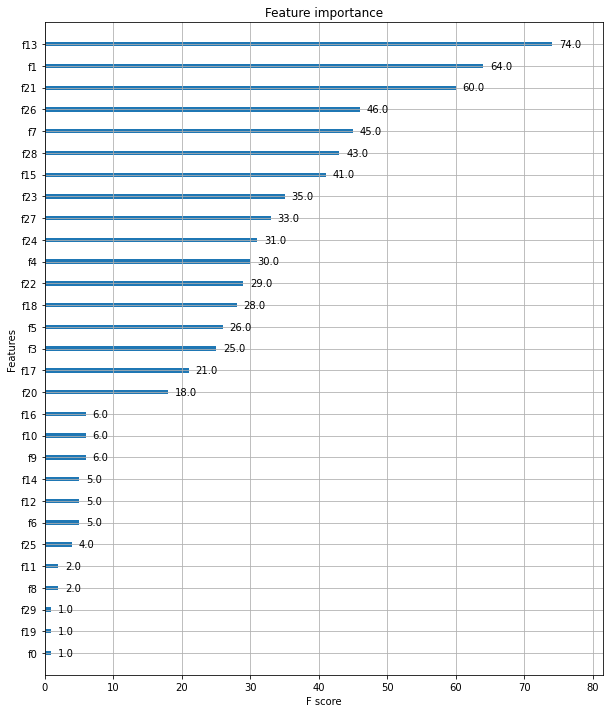

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [55]:
# 사이킷런 버전 xgboost
# eta -> learning_rate / sub_sample -> subsample / lambda -> reg_lambda / alpha -> reg_alpha
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [56]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [57]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08620
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08645
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [58]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [59]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set = evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

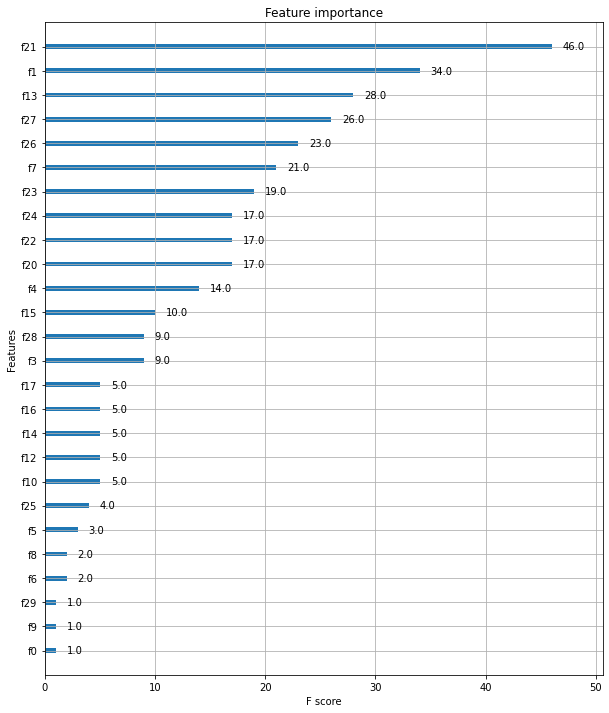

In [60]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

## LightGBM

XGBoost보다도 더 빠른 학습이 가능

XGBoost보다 성능이 떨어지진 않음. 다만 적은 데이터셋에 활용할 경우 과적합이 발생하기 쉬움(일반적으로 1만건 이하의 데이터)

LightGBM은 일반 GBM 계열과 다르게 리프 중심 트리분할 진행. 즉, 최종 리프의 높이가 동일하도록 양쪽 단계를 맞추는 게 아니라 한 줄기에서 계속 뻣어나가기도 함

LightGBM 하이퍼 파라미터

- num_iterations [default = 100] : 반복 수행하려는 트리의 수. 크게 지정할수록 성능이 높아질 수 있으나, 너무 크면 과적합 가능성
- learning_rate
- max_depth [default = -1] : 0보다 작은 값을 입력하면 깊이 제한 X
- min_data_in_leaf [default = 20] : 결정트리의 min_samples_leaf와 같은 파라미터
- num_leaves [default = 31]: 하나의 트리가 가질 수 있는 최대 리프 개수
- boosting [default = gbdt] : 부스팅의 트리를 생성하는 알고리즘. gbdt(일반적인 GBD), rf(랜덤포레스트)
- bagging_fraction [default = 1.0] : 데이터를 샘플링하는 비율
- feature_fraction [default = 1.0] : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
- lambda_l2 [default = 0.0] : L2_regulation 제어를 위한 값. 피처 개수가 많은 경우 적용을 검토하여 값이 클수록 과적합 감소 효과
- lambda_l1 [default = 0.0] : L1_regulation 제어를 위한 값. 피처 개수가 많은 경우 적용을 검토하여 값이 클수록 과적합 감소 효과

하이퍼 파라미터 튜닝 방안
- num_leaves의 개수를 높이면 정확도가 높아지지만, 트리의 깊이가 깊어지고 모델이 복잡해져 과적합 영향도 커짐
- min_data_in_leaf(싸이킷런엔 min_child_samples)는 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지

### LightGBM 적용 - 위스콘신 유방암 예측

In [66]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [67]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

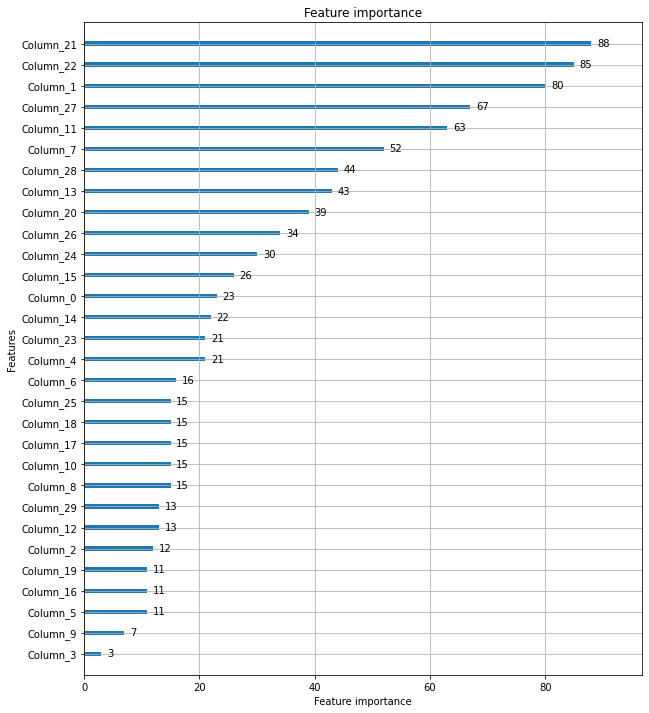

In [69]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### 캐글 신용카드 사기 검출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

card_df = pd.read_csv('C:/Users/ytnal/python/파머완/data/credit/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DF를 복사한 뒤 Time 컬럼만 삭제
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [76]:
print('학습 데이터 레이블 값 비율\n', y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율\n', y_test.value_counts()/y_test.shape[0]*100)

# 둘다 큰 차이 없이 잘 분할됨

학습 데이터 레이블 값 비율
 0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
 0    99.826785
1     0.173215
Name: Class, dtype: float64


In [77]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
lr_pred = clf_lr.predict(X_test)
lr_pred_proba = clf_lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   60    88]]
정확도: 0.9991, 정밀도: 0.8713, 재현율: 0.5946,    F1: 0.7068, AUC:0.9572


In [3]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [80]:
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)     # 극단적인 불균형이므로 boost_from_average 끄기
get_model_train_eval(clf_lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


데이터 분포도 변환 후 모델 학습/예측/평가

<AxesSubplot:xlabel='Amount', ylabel='Density'>

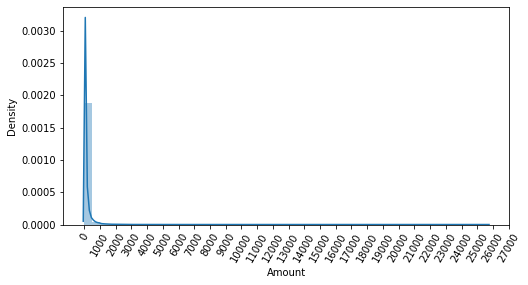

In [88]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [4]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [95]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

clf_lr = LogisticRegression()
get_model_train_eval(clf_lr, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

clf_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(clf_lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
오차 행렬
[[85146   149]
 [   81    67]]
정확도: 0.9973, 정밀도: 0.3102, 재현율: 0.4527,    F1: 0.3681, AUC:0.7253


In [5]:
# 로그변환 버전
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [97]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

clf_lr = LogisticRegression()
get_model_train_eval(clf_lr, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

clf_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(clf_lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
오차 행렬
[[85238    57]
 [   77    71]]
정확도: 0.9984, 정밀도: 0.5547, 재현율: 0.4797,    F1: 0.5145, AUC:0.7395


이상치 제거 후 모델 학습/예측/평가

<AxesSubplot:>

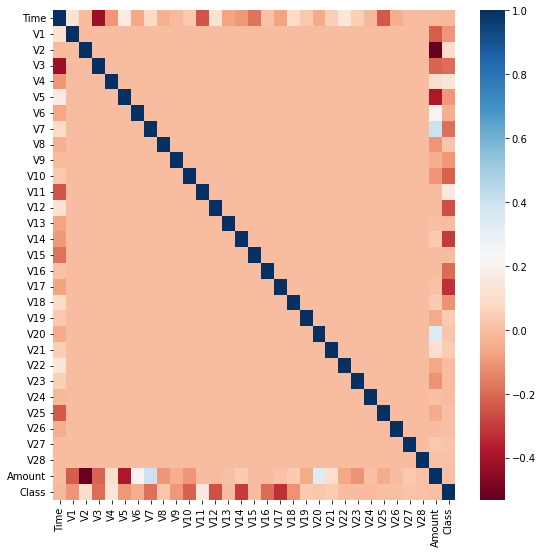

In [100]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [6]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [119]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [10]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제로직
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

clf_lr = LogisticRegression()
get_model_train_eval(clf_lr, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

clf_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(clf_lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

NameError: name 'get_clf_eval' is not defined

SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 셋: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 셋: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 셋:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 셋:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [15]:
clf_lr = LogisticRegression()

get_model_train_eval(clf_lr, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test=y_test)

오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743


In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

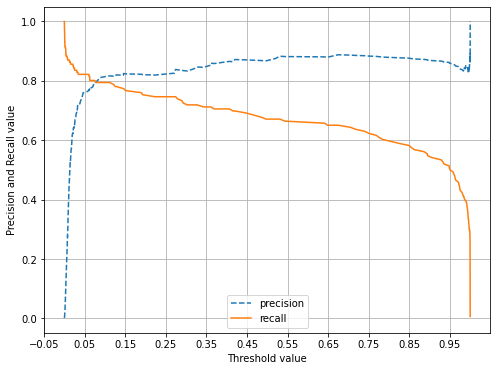

In [18]:
precision_recall_curve_plot(y_test, clf_lr.predict_proba(X_test)[:, 1])

In [19]:
clf_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(clf_lr, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test=y_test)

오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743


## 스태킹 앙상블

스태킹 : 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행. 기반 모델과 기반모델의 예측값을 바탕으로 학습하는 최종 메타 모델

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# 개별 ML 모델
clf_knn = KNeighborsClassifier(n_neighbors=4)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_dt = DecisionTreeClassifier()
clf_ada = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터셋을 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

clf_knn.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [19]:
knn_pred = clf_knn.predict(X_test)
rf_pred = clf_rf.predict(X_test)
dt_pred = clf_dt.predict(X_test)
ada_pred = clf_ada.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [20]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [21]:
# 각 모델의 예측값을 독립변수로 훈련 진행

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


CV 세트 기반 스태킹

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [23]:
knn_train, knn_test = get_stacking_base_datasets(clf_knn, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(clf_rf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(clf_dt, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(clf_ada, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [25]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피쳐 데이터 Shape:', X_train.shape, '원본 테스트 피쳐 데이터 Shape:', X_test.shape)
print('스태킹 학습 피쳐 데이터 Shape:', Stack_final_X_train.shape,
     '스태킹 테스트 피쳐 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피쳐 데이터 Shape: (455, 30) 원본 테스트 피쳐 데이터 Shape: (114, 30)
스태킹 학습 피쳐 데이터 Shape: (455, 4) 스태킹 테스트 피쳐 데이터 Shape: (114, 4)


In [96]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
